In [1]:
import os
import psycopg2
import pandas as pd
from dotenv import load_dotenv

## Connects to a PostgreSQL database and executes a given SQL query to load data into a DataFrame.

In [2]:
# Load environment variables from a .env file
load_dotenv()

# Retrieve database connection parameters from environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_USER = os.getenv("DB_USER")

def load_data_from_postgres(query):
   
    try:
        # Establish a connection to the PostgreSQL database
        connection = psycopg2.connect(
            host=DB_HOST,       # Database host
            port=DB_PORT,       # Database port
            database=DB_NAME,   # Database name
            password=DB_PASSWORD,# Database password
            user=DB_USER        # Database user
        )
        
        # Execute the query and load the result into a DataFrame
        df = pd.read_sql_query(query, connection)
        
        # Close the database connection
        connection.close()
        
        return df  # Return the DataFrame containing the query results

    except Exception as e:
        # Print an error message if an exception occurs
        print(f"An Error Occurred: {e}")

## Script to load xDR data from PostgreSQL into a pandas DataFrame for analysis

In [3]:
# Define the SQL query to select all data from the xdr_data table
query = "SELECT * FROM xdr_data"

# Load the data from PostgreSQL using the defined query
df = load_data_from_postgres(query)

# Check if the DataFrame was successfully loaded
if df is not None:
    print("Successfully loaded the data")  # Confirmation message for successful data loading
else:
    print("Failed to load data")  # Error message if loading data failed

# Display the first few rows of the DataFrame
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_21876\2582183969.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Identify Top Handsets and Manufacturers
#### Top 10 Handsets

In [4]:
# Identify top 10 handsets
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets Used by Customers:")
print(top_handsets)

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


#### Top 3 handset manufacturers

In [5]:
# Identify top 3 handset manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:")
print(top_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


#### Identify top 5 handsets per 3 manufacturers

In [6]:
# Initialize a dictionary to store top handsets for each manufacturer
top_handsets_per_manufacturer = {}

# Iterate over the top manufacturers
for manufacturer in top_manufacturers.index:
    # Filter the DataFrame for the current manufacturer and count the occurrences of each handset type
    # Store the top 5 handsets in the dictionary
    top_handsets_per_manufacturer[manufacturer] = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
# Print the top 5 handsets for each of the top 3 manufacturers
print("\nTop 5 Handsets per Top 3 Manufacturers:")
for manufacturer, handsets in top_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")  # Print the manufacturer's name
    print(handsets)  # Print the top handsets for that manufacturer


Top 5 Handsets per Top 3 Manufacturers:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


#### User behavior overview

In [7]:
# Aggregate user behavior
user_behavior = df.groupby('IMSI').agg(
    number_of_xDR_sessions=('Bearer Id', 'count'),
    session_duration=('Dur. (ms)', 'sum'),
    total_DL=('Total DL (Bytes)', 'sum'),
    total_UL=('Total UL (Bytes)', 'sum'),
    social_media_DL=('Social Media DL (Bytes)', 'sum'),
    google_DL=('Google DL (Bytes)', 'sum'),
    email_DL=('Email DL (Bytes)', 'sum'),
    youtube_DL=('Youtube DL (Bytes)', 'sum'),
    netflix_DL=('Netflix DL (Bytes)', 'sum'),
    gaming_DL=('Gaming DL (Bytes)', 'sum'),
    other_DL=('Other DL (Bytes)', 'sum')
).reset_index()

print(user_behavior.head(100))

            IMSI  number_of_xDR_sessions  session_duration     total_DL  \
0   2.040471e+14                       1          869844.0   78697597.0   
1   2.040808e+14                       1          877385.0  194828056.0   
2   2.082001e+14                       1           86019.0   31376981.0   
3   2.082001e+14                       1           86254.0  392918313.0   
4   2.082001e+14                       2          573923.0  961767023.0   
..           ...                     ...               ...          ...   
95  2.082003e+14                       1          136818.0  780288731.0   
96  2.082003e+14                       1          111261.0  506379008.0   
97  2.082003e+14                       1          158256.0  534313706.0   
98  2.082003e+14                       1          116676.0   48877492.0   
99  2.082003e+14                       1           93530.0  400056081.0   

      total_UL  social_media_DL   google_DL   email_DL  youtube_DL  \
0   60456049.0        1500145

### Exploratory Data Analysis(EDA)
#### Data cleaning

In [8]:
# Identify and treat outliers (e.g., remove top 5% as outliers)
for col in ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']:
    df = df[df[col] <= df[col].quantile(0.95)]  # Keep 95% of the data

# Validate data integrity: Check that upload and download speeds are not negative
df = df[(df['Total DL (Bytes)'] >= 0) & (df['Total UL (Bytes)'] >= 0)]

# session durations are not negative
df = df[df['Dur. (ms)'] >= 0]

#### Describe relevant variables

In [9]:
# Describe relevant variables and their data types
description = df.describe(include='all')
print(description)

           Bearer Id           Start       Start ms             End  \
count   1.277140e+05          128606  128606.000000          128606   
unique           NaN            8036            NaN            6225   
top              NaN  4/26/2019 7:25            NaN  4/25/2019 0:01   
freq             NaN             188            NaN            1028   
mean    1.013895e+19             NaN     499.252741             NaN   
std     2.893980e+18             NaN     288.566331             NaN   
min     6.917538e+18             NaN       0.000000             NaN   
25%     7.349883e+18             NaN     250.000000             NaN   
50%     7.349883e+18             NaN     499.000000             NaN   
75%     1.304243e+19             NaN     749.000000             NaN   
max     1.318654e+19             NaN     999.000000             NaN   

              End ms      Dur. (ms)          IMSI  MSISDN/Number  \
count   128606.00000  128606.000000  1.281050e+05   1.276800e+05   
unique     

#### Segment users into deciles

In [10]:
# Segment users into decile classes based on session duration
user_behavior['decile_class'] = pd.qcut(user_behavior['session_duration'], 5, labels=False)

# Compute total data (DL + UL) per decile class
total_data_per_decile = user_behavior.groupby('decile_class')[['total_DL', 'total_UL']].sum()
print(total_data_per_decile)

                  total_DL      total_UL
decile_class                            
0             1.060645e+13  9.566171e+11
1             1.167460e+13  1.057264e+12
2             1.056633e+13  9.564600e+11
3             1.285782e+13  1.161486e+12
4             2.223329e+13  2.012848e+12


#### Non-Graphical Univariate Analysis

In [12]:
# Compute dispersion parameters (standard deviation)
std_dev = user_behavior[['total_DL', 'total_UL', 'session_duration']].std()
print("Standard Deviation:")
print(std_dev)

Standard Deviation:
total_DL            4.643722e+08
total_UL            3.564266e+07
session_duration    1.863518e+05
dtype: float64


#### Graphical Univariate Analysis


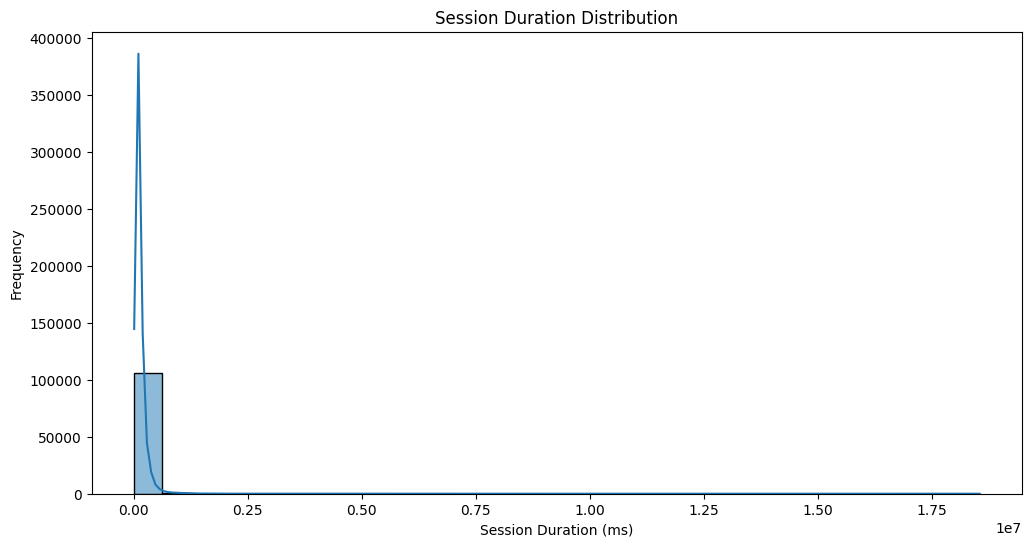

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of session duration
plt.figure(figsize=(12, 6))
sns.histplot(user_behavior['session_duration'], bins=30, kde=True)
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

#### Bivariate analysis

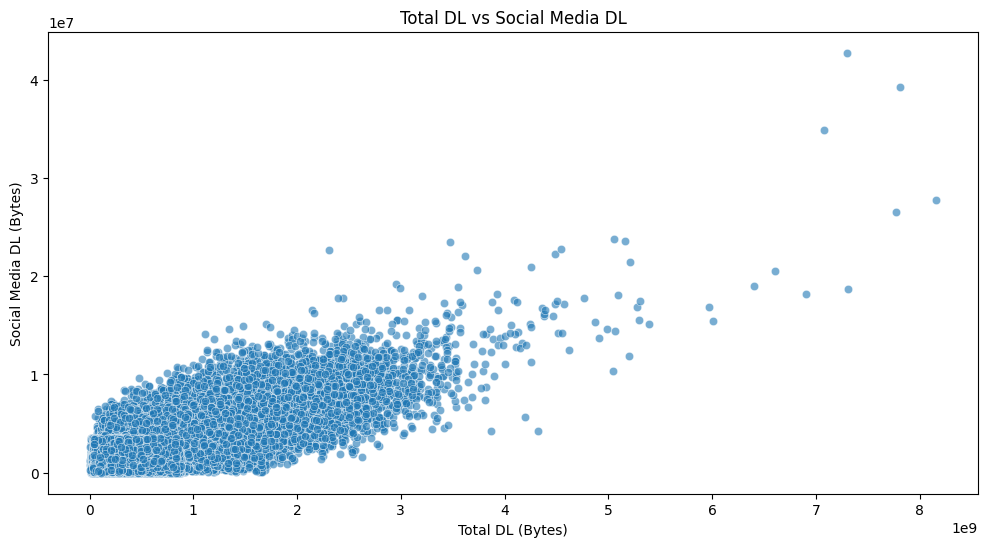

In [14]:
# Explore relationships between applications and total DL+UL data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=user_behavior, x='total_DL', y='social_media_DL', alpha=0.6)
plt.title('Total DL vs Social Media DL')
plt.xlabel('Total DL (Bytes)')
plt.ylabel('Social Media DL (Bytes)')
plt.show()

#### Correlation analysis

In [15]:
# Compute a correlation matrix
correlation_matrix = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                         'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           0.001447   
Google DL (Bytes)                       0.001447           1.000000   
Email DL (Bytes)                        0.003724          -0.000462   
Youtube DL (Bytes)                     -0.002096           0.000162   
Netflix DL (Bytes)                     -0.002263          -0.000124   
Gaming DL (Bytes)                      -0.001632          -0.007294   
Other DL (Bytes)                        0.005846          -0.001817   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.003724           -0.002096   
Google DL (Bytes)               -0.000462            0.000162   
Email DL (Bytes)                 1.000000            0.001325   
Youtube DL (Bytes)               0.001325            1.000000   
Netflix DL (Bytes)               0.001045            0.001432   
Gaming DL (Bytes)    

#### Dimensionality reduction with PCA

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA
features = df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
               'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]
features_scaled = StandardScaler().fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("PCA Results:")
print(pca_df.head())

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:")
print(explained_variance)

PCA Results:
        PC1       PC2
0  0.243592  0.980096
1  0.378702  1.006181
2 -0.488466  0.968168
3  0.700005  1.905920
4  0.474193 -1.654010
Explained Variance Ratios:
[0.14695898 0.14394945]


## User Engagement Analysis

#### Aggregate metrics per customer

In [17]:
engagement_metrics = df.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),  # Count sessions per customer
    total_duration=('Dur. (ms)', 'sum'),       # Sum of session durations
    total_DL=('Total DL (Bytes)', 'sum'),      # Sum of total download traffic
    total_UL=('Total UL (Bytes)', 'sum')       # Sum of total upload traffic
).reset_index()

# Calculate total traffic after aggregation
engagement_metrics['total_traffic'] = engagement_metrics['total_DL'] + engagement_metrics['total_UL']

engagement_metrics.head()

,MSISDN/Number,session_frequency,total_duration,total_DL,total_UL,total_traffic
0,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08
1,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,5.959665e+08
2,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08
3,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09
4,3.360101e+10,2,253983.0,5.552080e+08,60009249.0,6.152172e+08


#### Top 10 customers per engagement metrics

In [18]:
top_customers_frequency = engagement_metrics.nlargest(10, 'session_frequency')
top_customers_duration = engagement_metrics.nlargest(10, 'total_duration')
top_customers_traffic = engagement_metrics.nlargest(10, 'total_traffic')

# Print top customers for each metric
print("Top 10 Customers by Session Frequency:")
print(top_customers_frequency)
print("\nTop 10 Customers by Total Duration:")
print(top_customers_duration)
print("\nTop 10 Customers by Total Traffic:")
print(top_customers_traffic)

Top 10 Customers by Session Frequency:
       MSISDN/Number  session_frequency  total_duration      total_DL  \
63868   3.366907e+10                 11        610801.0  3.477886e+09   
1464    3.360658e+10                  8       1278102.0  3.538440e+09   
22178   3.365043e+10                  8        684959.0  3.901098e+09   
52752   3.366508e+10                  8        691273.0  2.840108e+09   
65494   3.366971e+10                  8        656655.0  3.180536e+09   
5689    3.361471e+10                  7        170680.0  3.690667e+09   
14228   3.363043e+10                  7        606659.0  2.808531e+09   
19069   3.364618e+10                  7       1100518.0  2.685806e+09   
20958   3.365010e+10                  7        592044.0  2.597545e+09   
30273   3.365899e+10                  7        600915.0  2.899545e+09   

          total_UL  total_traffic  
63868  428655875.0   3.906542e+09  
1464   317383142.0   3.855823e+09  
22178  281234070.0   4.182332e+09  
52752  331680

#### Normalize engagement metrics

In [19]:
from sklearn.preprocessing import StandardScaler

# Normalize the engagement metrics to prepare for clustering
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['session_frequency', 'total_duration', 'total_traffic']])
normalized_metrics

array([[-0.47350876,  0.64990307, -1.12854451],
       [-0.47350876,  0.13561244, -0.08293595],
       [-0.47350876, -0.81035726, -0.4964242 ],
       ...,
       [ 0.97196919,  0.97406815,  1.10464089],
       [-0.47350876, -1.26691652,  0.19965532],
       [-0.47350876,  0.20252658, -0.35834545]])

#### Run K-Means clustering

In [20]:
from sklearn.cluster import KMeans

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['cluster'] = kmeans.fit_predict(normalized_metrics)
engagement_metrics

,MSISDN/Number,session_frequency,total_duration,total_DL,total_UL,total_traffic,cluster
0,3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08,0
1,3.360100e+10,1,134969.0,5.566597e+08,39306820.0,5.959665e+08,0
2,3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08,0
3,3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09,2
4,3.360101e+10,2,253983.0,5.552080e+08,60009249.0,6.152172e+08,2
...,...,...,...,...,...,...,...
95871,3.378996e+10,1,157069.0,6.741405e+08,36147061.0,7.102876e+08,0
95872,3.378997e+10,1,160461.0,1.740564e+08,34066711.0,2.081231e+08,0
95873,3.378998e+10,2,210389.0,1.023862e+09,70831420.0,1.094693e+09,2
95874,3.379000e+10,1,8810.0,6.879252e+08,26716429.0,7.146416e+08,0


#### Computer mtrics per cluster

In [21]:
# Calculate min, max, average, and total non-normalized metrics for each cluster
cluster_summary = engagement_metrics.groupby('cluster').agg(
    min_frequency=('session_frequency', 'min'),
    max_frequency=('session_frequency', 'max'),
    avg_duration=('total_duration', 'mean'),
    total_traffic=('total_traffic', 'sum')
).reset_index()
cluster_summary

,cluster,min_frequency,max_frequency,avg_duration,total_traffic
0,0,0,2,93446.121445,3.483579e+13
1,1,2,11,372600.770620,7.636387e+12
2,2,1,4,183664.454811,1.800599e+13


#### Visualize clusters

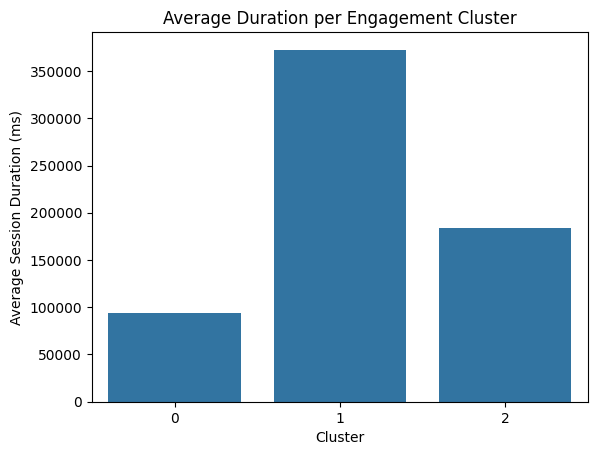

In [22]:
# Create bar plots to visualize average session duration by cluster
sns.barplot(data=cluster_summary, x='cluster', y='avg_duration')
plt.title('Average Duration per Engagement Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Session Duration (ms)')
plt.show()

#### Aggregate traffic per application

In [23]:
# Create a list to hold the aggregated traffic data
app_traffic_list = []

# Define the application categories and their corresponding download and upload columns
application_categories = {
    'Social Media': ['Social Media DL (Bytes)', 'Social Media UL (Bytes)'],
    'Google': ['Google DL (Bytes)', 'Google UL (Bytes)'],
    'Email': ['Email DL (Bytes)', 'Email UL (Bytes)'],
    'Youtube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}

# Aggregate traffic for each application category
for app_name, traffic_columns in application_categories.items():
    total_DL = df[traffic_columns[0]].sum()  # Total download for the application
    total_UL = df[traffic_columns[1]].sum()  # Total upload for the application
    
    # Append the results as a dictionary to the list
    app_traffic_list.append({
        'application': app_name,
        'total_DL': total_DL,
        'total_UL': total_UL,
        'total_traffic': total_DL + total_UL
    })

# Create a DataFrame from the list of dictionaries
app_traffic = pd.DataFrame(app_traffic_list)

# Display the aggregated traffic data per application
print(app_traffic)

    application      total_DL      total_UL  total_traffic
0  Social Media  2.307485e+11  4.233590e+09   2.349821e+11
1        Google  7.377796e+11  2.624582e+11   1.000238e+12
2         Email  2.301749e+11  6.001689e+10   2.901917e+11
3       Youtube  1.488266e+12  1.368978e+12   2.857244e+12
4       Netflix  1.487065e+12  1.368663e+12   2.855728e+12
5        Gaming  5.160746e+13  1.036522e+12   5.264398e+13
6         Other  5.419235e+13  1.034775e+12   5.522712e+13


#### Top 10 most engaged users per application

In [24]:
# Create an empty DataFrame to hold the top users per application
top_users_per_app = {}

# Loop through each application category to compute user traffic
for app_name, traffic_columns in application_categories.items():
    user_traffic = df[['MSISDN/Number'] + traffic_columns]
    
    user_traffic['total_traffic'] = user_traffic[traffic_columns[0]] + user_traffic[traffic_columns[1]]
    
    user_traffic_sum = user_traffic.groupby('MSISDN/Number').agg(total_traffic=('total_traffic', 'sum')).reset_index()
    
    user_traffic_sum['application'] = app_name
    
    top_10_users = user_traffic_sum.nlargest(10, 'total_traffic')
    
    # Store results in a dictionary
    top_users_per_app[app_name] = top_10_users

# Display the top users per application
for app_name, users in top_users_per_app.items():
    print(f"\nTop 10 Most Engaged Users for {app_name}:")
    print("")
    print(users)
    print("")

C:\Users\hp\AppData\Local\Temp\ipykernel_21876\1932469755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_traffic['total_traffic'] = user_traffic[traffic_columns[0]] + user_traffic[traffic_columns[1]]
C:\Users\hp\AppData\Local\Temp\ipykernel_21876\1932469755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_traffic['total_traffic'] = user_traffic[traffic_columns[0]] + user_traffic[traffic_columns[1]]
C:\Users\hp\AppData\Local\Temp\ipykernel_21876\1932469755.py:8: SettingWithCopyWarning: 
A v


Top 10 Most Engaged Users for Social Media:

       MSISDN/Number  total_traffic   application
63868   3.366907e+10     23800834.0  Social Media
26709   3.365816e+10     17982623.0  Social Media
33310   3.365973e+10     17311846.0  Social Media
33594   3.365980e+10     16585183.0  Social Media
20958   3.365010e+10     16105635.0  Social Media
1464    3.360658e+10     15950782.0  Social Media
35282   3.366025e+10     15948611.0  Social Media
68780   3.367608e+10     15720516.0  Social Media
30250   3.365899e+10     15643422.0  Social Media
58136   3.366699e+10     15285189.0  Social Media


Top 10 Most Engaged Users for Google:

       MSISDN/Number  total_traffic application
1464    3.360658e+10     79754779.0      Google
63868   3.366907e+10     77824684.0      Google
68780   3.367608e+10     71974850.0      Google
22178   3.365043e+10     71589659.0      Google
52752   3.366508e+10     67692063.0      Google
26709   3.365816e+10     65332551.0      Google
58136   3.366699e+10     64

C:\Users\hp\AppData\Local\Temp\ipykernel_21876\1932469755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_traffic['total_traffic'] = user_traffic[traffic_columns[0]] + user_traffic[traffic_columns[1]]
C:\Users\hp\AppData\Local\Temp\ipykernel_21876\1932469755.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_traffic['total_traffic'] = user_traffic[traffic_columns[0]] + user_traffic[traffic_columns[1]]


#### Optimize value of K using Elbow Method

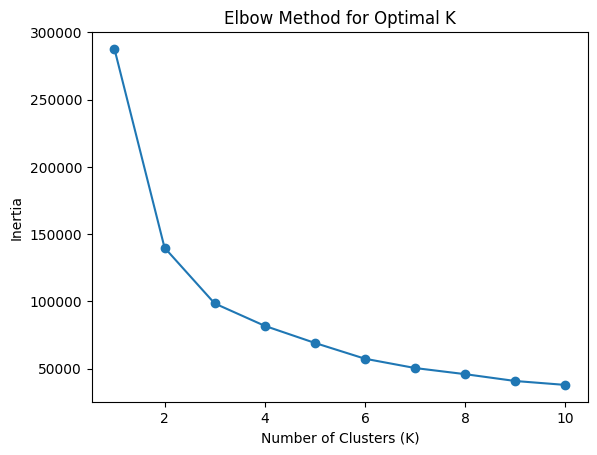

In [25]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the results of the elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()